# Chapter 3 

En este capitulo desarrollare un modelo que permita predicir, los valores de venta de mis datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("e:/piere/Documentos/Portafolio/JMIA/Data/Proccesed/JMIA_Limpia.csv")

In [4]:
df.head(3)

,Date,Open,High,Low,Adj Close,Volume
0,2019-04-12,18.950001,25.459999,18.260000,25.459999,9472300
1,2019-04-15,26.940001,39.950001,25.629999,31.910000,12857300
2,2019-04-16,35.330002,43.500000,33.099998,43.040001,12939400


In [5]:
df.shape

(653, 6)

Para hacer nuestro modelo solo utilizaremos como X los valores de Open y Volumen. Ya que los demás, son involucrados después del cierre de las cotizaciones diarias.

In [17]:
x_cols=list(set(list(df.columns))-set(list(["Low","High","Date","Adj Close"])))
y_cols="Adj Close"

In [18]:
X=df[x_cols]
y=df[y_cols]

Utilizaré 3 modelos para comparar mis resultados. Iremos desde una regresión lineal simple hasta una robusta, pasando por una que tenga coeficiente de estandarización como ElasticNet.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=False)

In [109]:
regr=LinearRegression().fit(X_train,y_train)

In [110]:
regr_y_predict=regr.predict(X_test)

In [111]:
regr.score(X_test,y_test)

0.9790757806872272

In [112]:
mean_squared_error(y_test,regr_y_predict)

2.794160347208429

In [113]:
a=X_test.index.tolist()
df_plt=df[df.index.isin(a)]



In [114]:
df_pred=pd.DataFrame(regr_y_predict,index=y_test.index)

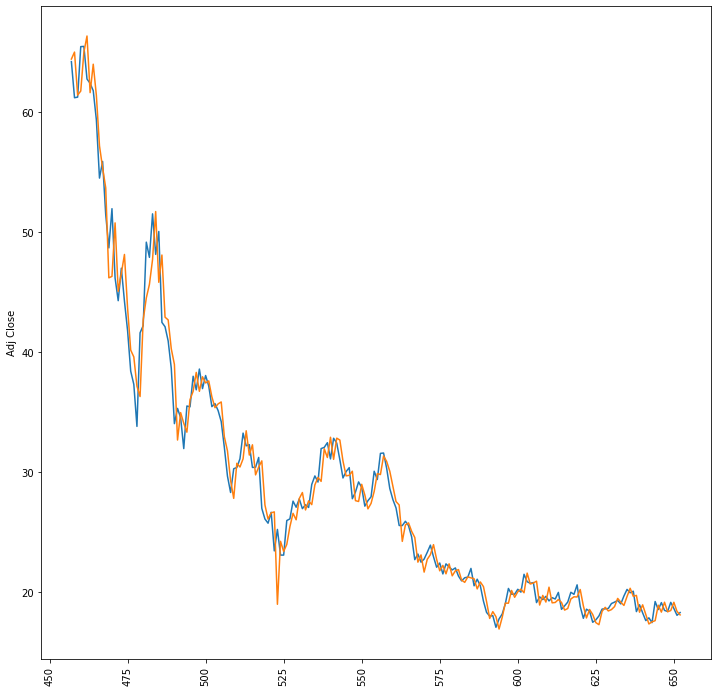

In [119]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df_plt,x=df_plt.index,y=y_test)
sns.lineplot(data=df_pred,x=df_pred.index,y=regr_y_predict)
plt.xticks(rotation=90);